In [1]:
#I import the libraries I may need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import json
import gzip

#### Loading and preparing the dataset

In [2]:
f = gzip.open("C:/Users/Marta/Desktop/Bokio_datascience/Bokio_datascience_data.gz", "rb")
print(type(f))

<class 'gzip.GzipFile'>


In [3]:
#Opening the file, it is a string 
with gzip.open("C:/Users/Marta/Desktop/Bokio_datascience/Bokio_datascience_data.gz", "rb") as f:
    data = json.loads(json.dumps(f.read().decode("ascii")))
type(data)

str

In [4]:
#Lets have a look. It is a string, we want to end up with a list of dictionaries
print(data[0:600])
print('\n')
print(data[-600:-1])
#print(data[-1])

{"timestamp": 1422805310166, "event_type": "Button Tap", "client_id": "26a27236a1"}
{"timestamp": 1422805401651, "event_type": "ViewLoaded", "client_id": "26a27236a1"}
{"timestamp": 1422805451625, "event_type": "Vote", "client_id": "26a27236a1"}
{"timestamp": 1422805451636, "event_type": "Vote", "client_id": "26a27236a1"}
{"timestamp": 1422805427334, "event_type": "ViewLoaded", "client_id": "26a27236a1"}
{"timestamp": 1422805451644, "event_type": "Vote", "client_id": "26a27236a1"}
{"timestamp": 1422806532210, "event_type": "session.stop", "client_id": "26a27236a1"}
{"timestamp": 1422750697909,


"f64a315b07"}
{"timestamp": 1422820512616, "event_type": "session.resume", "client_id": "f64a315b07"}
{"timestamp": 1422820512611, "event_type": "ViewLoaded", "client_id": "f64a315b07"}
{"timestamp": 1422820620599, "event_type": "session.resume", "client_id": "f64a315b07"}
{"timestamp": 1422820620571, "event_type": "session.pause", "client_id": "f64a315b07"}
{"timestamp": 1422820590296, "event_

In [5]:
#We split into a list
datalist = data.split('\n')

In [6]:
#Lets check the beggining and the end; we do not like the end.
print(datalist[0],'\n',datalist[-1])

{"timestamp": 1422805310166, "event_type": "Button Tap", "client_id": "26a27236a1"} 
 {


In [7]:
#Removing the last one, and checking it looks ok now
datalist = datalist[:-1]
print(datalist[0],'\n',datalist[-1])

{"timestamp": 1422805310166, "event_type": "Button Tap", "client_id": "26a27236a1"} 
 {"timestamp": 1422820589438, "event_type": "Ads", "client_id": "f64a315b07"}


In [8]:
#We change the data to a list of dictionaries #List comprenhension
import ast 
dictlist = [ast.literal_eval(i) for i in datalist]

In [9]:
#Checking all is at it should...
print(dictlist[0],'\n',dictlist[-1])

{'timestamp': 1422805310166, 'event_type': 'Button Tap', 'client_id': '26a27236a1'} 
 {'timestamp': 1422820589438, 'event_type': 'Ads', 'client_id': 'f64a315b07'}


In [34]:
#going to dataframe and having a first look
dataframe = pd.DataFrame(dictlist)
print(dataframe.head(5),'\n\n', dataframe.tail(5),'\n')
print(type(dataframe),'\n',dataframe.shape,'\n',dataframe.dtypes)

    client_id  event_type      timestamp
0  26a27236a1  Button Tap  1422805310166
1  26a27236a1  ViewLoaded  1422805401651
2  26a27236a1        Vote  1422805451625
3  26a27236a1        Vote  1422805451636
4  26a27236a1  ViewLoaded  1422805427334 

         client_id      event_type      timestamp
99994  f64a315b07  session.resume  1422820620599
99995  f64a315b07   session.pause  1422820620571
99996  f64a315b07             Ads  1422820590296
99997  f64a315b07      ViewLoaded  1422820590292
99998  f64a315b07             Ads  1422820589438 

<class 'pandas.core.frame.DataFrame'> 
 (99999, 3) 
 client_id     object
event_type    object
timestamp      int64
dtype: object


In [35]:
#Lets check if there are missing values, null, na or nan. There are not! 
dataframe.isnull().sum().sum()

0

In [36]:
#We have 1664 distinct client ids 
len(dataframe.client_id.unique())

1664

In [37]:
#And those are the distinct event types
print(dataframe.event_type.unique(),'\n',len(dataframe.event_type.unique()))

['Button Tap' 'ViewLoaded' 'Vote' 'session.stop' 'App Launch'
 'session.start' 'session.resume' 'httpRequestTiming' 'session.pause'
 'Ads' 'Daily App Launch' 'Follow' 'Startup Guide Finished' 'Mute'
 'Unfollow' 'Search' 'Change Notifications' 'Share' 'iOSVersion' 'Widget'
 'Viewing Media Item' 'Matches' 'Notification Settings'
 'TreatmentsAllocated' 'Notifications ABTest'] 
 25


## First question: 
A toplist of different event_types where we count number of unique
client_ids per event_type

In [38]:
clients_per_event = dataframe.groupby('event_type')['client_id'].nunique()
type(clients_per_event)

pandas.core.series.Series

In [39]:
#Here are the distinct event types sorted per number of distinct client id 
clients_per_event.sort_values(ascending= False)

event_type
ViewLoaded                1636
session.start             1593
session.stop              1588
App Launch                1516
session.pause              683
httpRequestTiming          568
session.resume             554
Ads                        440
Daily App Launch           424
Button Tap                 317
Follow                     137
Vote                       124
Search                      66
Change Notifications        63
Mute                        30
Unfollow                    22
Startup Guide Finished      16
iOSVersion                   7
Viewing Media Item           6
Notifications ABTest         3
TreatmentsAllocated          3
Notification Settings        2
Matches                      1
Share                        1
Widget                       1
Name: client_id, dtype: int64

In [40]:
# A top 10 list in proportion 
sortedlist = clients_per_event.sort_values(ascending= False)/len(dataframe.client_id.unique())
sortedlist.head(10)

event_type
ViewLoaded           0.983173
session.start        0.957332
session.stop         0.954327
App Launch           0.911058
session.pause        0.410457
httpRequestTiming    0.341346
session.resume       0.332933
Ads                  0.264423
Daily App Launch     0.254808
Button Tap           0.190505
Name: client_id, dtype: float64

## Second question:
For how long does the median user use the app?

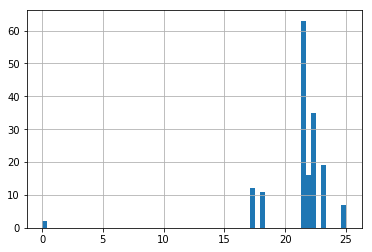

In [41]:
#what I made up for puting 0 as the first event we have from a particular user, as example
anuser = dataframe[dataframe['client_id']=='f64a315b07']['timestamp']
anuser_normsort = ((anuser-anuser.min())/3600000.0).sort_values()
anuser_normsort.hist(bins=60 ,xlabelsize=10)
plt.show()

In [42]:
#I want to put it in an array, and take the difference in time between actions
anuser_array = anuser_normsort.values
diff = anuser_array[1:]-anuser_array[:-1]

3.539604761904741


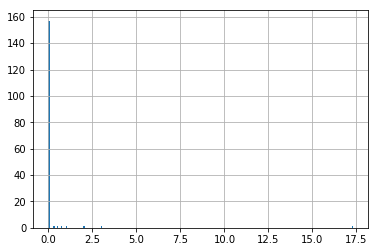

In [46]:
#Now, for an user, I can obtain the mean time in the app, considering that no action during 30 min implies no use
#Without kwoing more details about the app, I can not judge if 30 minutes is reasonable; maybe 10 o even 5 minutes of 
#no activity is already a new login, and the results can change a lot... alterate the command "sep" with the number 
#of minutes you consider reasonable for a "new use of the app"
j = 1
smallsum = 0
bigsum = 0
sep = 30 
for i in diff:
    if i < (sep/60):
        smallsum=smallsum+i
    else:
        bigsum=bigsum+smallsum
        j=j+1
        smallsum=0
usermean=(bigsum+smallsum)/j
print(usermean*60)#This is in minutes

#To see the differences in time
pd.Series(diff).hist(bins=244 ,xlabelsize=10)
plt.show()

The previous was a particular case for me to understand the data and identify potential problems. Now, we generalize:

In [20]:
dataframe['client_id'].unique()

array(['26a27236a1', '51c987d5b1', 'ec2732ad92', ..., 'eae1b78e21',
       '0be4297e69', '69a6dda770'], dtype=object)

In [21]:
#for any particular user
#As a rule of thumb and with some robutness criterias, I have end up considering inactivity of more than 5 minutes
#as new ussage
usermeanlist = []
for i in dataframe['client_id'].unique():
    anuser = dataframe[dataframe['client_id']== i ]['timestamp']
    anuser_normsort = ((anuser-anuser.min())/3600000.0).sort_values()
    anuser_array = anuser_normsort.values
    diff = anuser_array[1:]-anuser_array[:-1]
    j = 1
    smallsum = 0
    bigsum = 0
    sep = 5 #This parameter is the numer of minutes of innactivity we allow until consider "new ussage"
    for k in diff:
        if k < (sep/60):
            smallsum=smallsum+k
        else:
            bigsum=bigsum+smallsum
            j=j+1
            smallsum=0
    usermean=(bigsum+smallsum)/j
    usermeanlist.append(usermean*60) #to have it in minutes

In [22]:
#I calculate the mean and standard deviation, to have an idea of the scale and robustness
a = np.array(usermeanlist).mean()
b = np.array(usermeanlist).std()
print(a,b)

1.505173482441408 1.6784430543253663


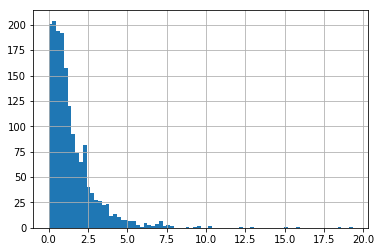

In [23]:
#To see the differences in time. It is exponential, that was expected.
pd.Series(usermeanlist).hist(bins=80 ,xlabelsize=10)
plt.show()

In [24]:
#This is the median time an user uses the app, in minutes
print('Median time an user uses the app: ',np.median(usermeanlist), ' minutes')

Median time an user uses the app:  1.0218673611111102  minutes
